# Excercise 1 

## Review of data wrangling and visualization in Python

In this excercise we will familiarize ourselves with pandas, and matplotlib package.

Course of excercise:

1. Import Data1.csv file to python.
2. Set first column as the index.
3. Plot all columns as time series.
4. Plot histograms of all columns, verify bin size. Plot all on a single, faceted plot.
5. Plot KDE-s (Kernel Denisty Estimators) for all columns. 
6. Repeat analysis for columns $\theta_1$-$\theta_4$ in 2018.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# importing the csv file, 1st column set as index
data = pd.read_csv(r'Data1.csv', parse_dates=True)
data.set_index('Unnamed: 0')

data.head()

,Unnamed: 0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


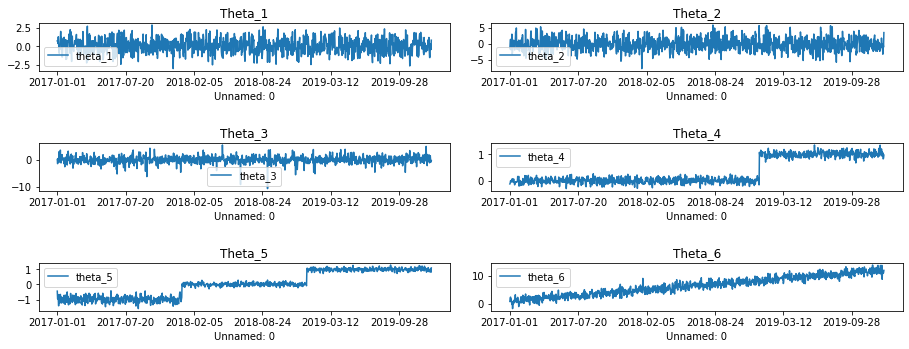

In [76]:
col_N = 2
row_N = 3

f, ax = plt.subplots(row_N, col_N, figsize=(15,5))
data.plot('Unnamed: 0','theta_1', ax=ax[0][0], title = 'Theta_1')
data.plot('Unnamed: 0','theta_2', ax=ax[0][1], title = 'Theta_2')
data.plot('Unnamed: 0','theta_3', ax=ax[1][0], title = 'Theta_3')
data.plot('Unnamed: 0','theta_4', ax=ax[1][1], title = 'Theta_4')
data.plot('Unnamed: 0','theta_5', ax=ax[2][0], title = 'Theta_5')
data.plot('Unnamed: 0','theta_6', ax=ax[2][1], title = 'Theta_6')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=1.5)

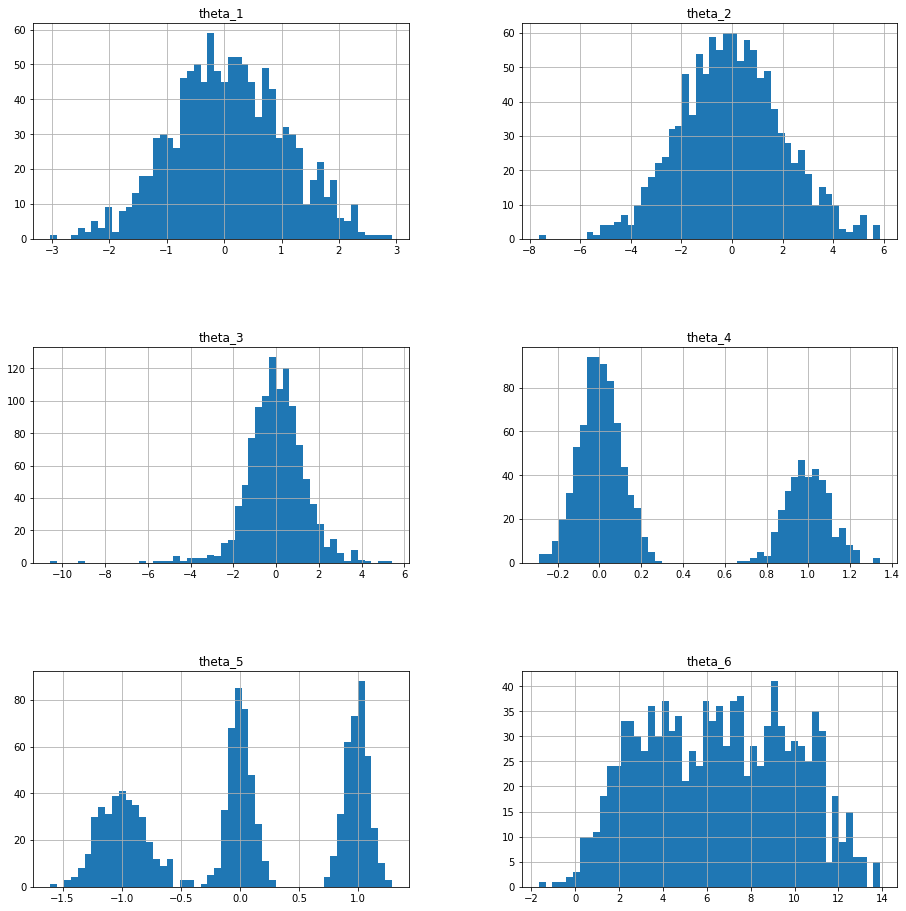

In [77]:
f, ax = plt.subplots(row_N, col_N, figsize=(15,15))
data.hist('theta_1', bins = 50, ax=ax[0][0])
data.hist('theta_2', bins = 50, ax=ax[0][1])
data.hist('theta_3', bins = 50, ax=ax[1][0])
data.hist('theta_4', bins = 50, ax=ax[1][1])
data.hist('theta_5', bins = 50, ax=ax[2][0])
data.hist('theta_6', bins = 50, ax=ax[2][1])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)

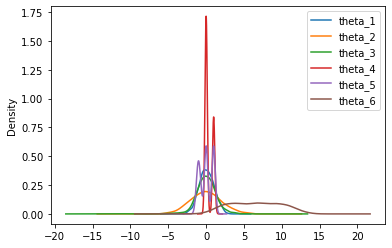

In [78]:
# plot Kernel Density Estimators
data.plot.kde()
plt.show()

In [79]:
# filtering columns
filtered_data = data.loc[(data['Unnamed: 0'] >= '2018-01-01') & (data['Unnamed: 0'] <= '2018-12-31')]
filtered_data = filtered_data[['Unnamed: 0', 'theta_1', 'theta_2','theta_3', 'theta_4']]
filtered_data.set_index('Unnamed: 0')

filtered_data

,Unnamed: 0,theta_1,theta_2,theta_3,theta_4
365,2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
366,2018-01-02,-0.283107,-0.979955,1.233933,0.158031
367,2018-01-03,1.572221,-2.033528,2.196317,0.041347
368,2018-01-04,-1.042981,0.651530,1.060125,0.064832
369,2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025
...,...,...,...,...,...
725,2018-12-27,0.473556,-0.651265,-0.523058,0.076798
726,2018-12-28,1.433117,0.325632,0.905920,0.028891
727,2018-12-29,0.285428,-0.476290,1.082404,0.111482
728,2018-12-30,2.249273,-1.233575,-0.666277,-0.080878


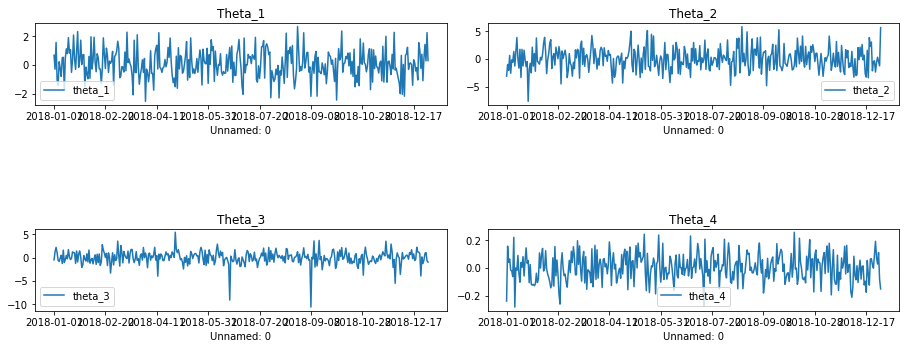

In [80]:
f, ax = plt.subplots(2,2, figsize=(15,5))
filtered_data.plot('Unnamed: 0','theta_1', ax=ax[0][0], title = 'Theta_1')
filtered_data.plot('Unnamed: 0','theta_2', ax=ax[0][1], title = 'Theta_2')
filtered_data.plot('Unnamed: 0','theta_3', ax=ax[1][0], title = 'Theta_3')
filtered_data.plot('Unnamed: 0','theta_4', ax=ax[1][1], title = 'Theta_4')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=1.5)

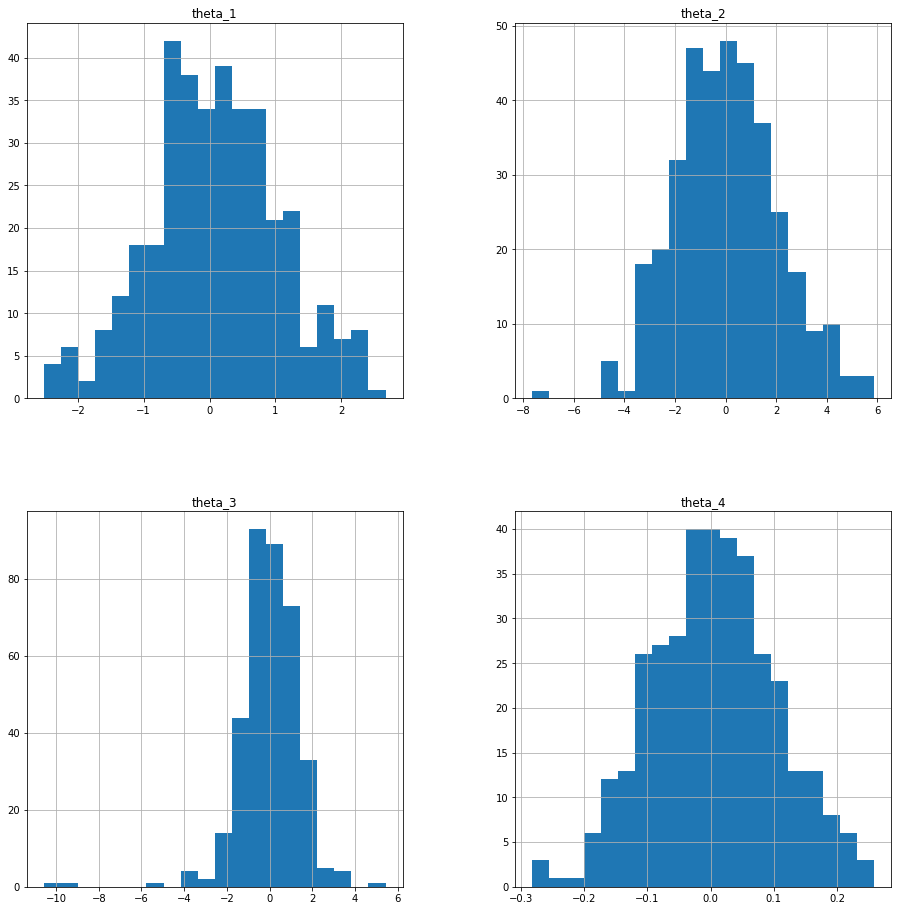

In [81]:
f, ax = plt.subplots(2,2, figsize=(15,15))
filtered_data.hist('theta_1', bins = 20, ax=ax[0][0])
filtered_data.hist('theta_2', bins = 20, ax=ax[0][1])
filtered_data.hist('theta_3', bins = 20, ax=ax[1][0])
filtered_data.hist('theta_4', bins = 20, ax=ax[1][1])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

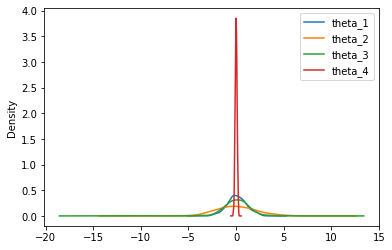

In [82]:
# plot Kernel Density Estimators
filtered_data.plot.kde()
plt.show()

# Excercise 2

Installation of [```cmdstanpy```](https://cmdstanpy.readthedocs.io/en/v0.9.68/index.html)
1. Install ```cmdstanpy``` package
2. Install cmdstan
2. Create a dataset (as a dictionary) of F+L binary samples with F zeros and L ones, with F=number of letters in first name, L=number of letters in last name. Dictionary needs to consist of N=F+L, and y = list of samples.
3. Create a cmdstanpy model from ```bern_1.stan``` code provided.
4. Sample from the model using the dataset and ```.sample()``` method
5. Extract $\theta$ variable and create its histogram.
6. Using ```.summary()``` method get mean, median and 5% and 95% quantiles of theta, and mark them on the histogram.

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


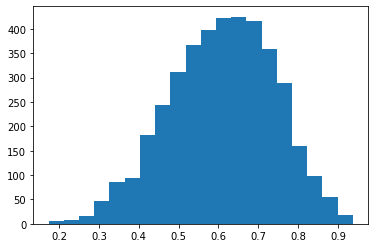

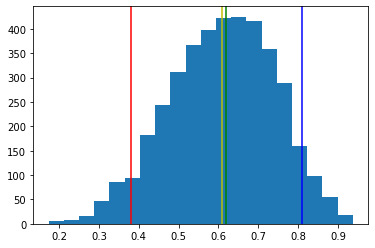

In [83]:
from cmdstanpy import CmdStanModel

# creating the dataset
samples = {
 "N" : 11,
 "y" : [0,0,0,0,1,1,1,1,1,1,1]
}

# creating the model
bernModel = CmdStanModel(stan_file=r'bern_1.stan')

# performing sampling
bernModel_sampled = bernModel.sample(data=samples, output_dir='.')

# extracting theta variable
theta = bernModel_sampled.stan_variable('theta')

# histogram
plt.hist(theta, bins = 20), plt.show()

# mean, median, 5% and 95% quantiles of theta
summary = bernModel_sampled.summary()
plt.hist(theta, bins = 20)
plt.axvline(summary['5%']['theta'], color='r')
plt.axvline(summary['50%']['theta'], color='g')
plt.axvline(summary['95%']['theta'], color='b')
plt.axvline(theta.mean(), color='y')
plt.show()